In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors

In [2]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)})

In [3]:
import csv
with open('Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv','r') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=";")
    rawdata = [x for x in reader]

In [4]:
lig_MOLECULES = [Chem.MolFromSmiles(x['Smiles']) for x in rawdata]

Načtení erbB1

In [5]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [07:06:46] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [07:06:46] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [07:06:46] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [07:06:46] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [07:06:46] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [07:06:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [07:06:46] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [07:06:46] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [07:06:46] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [07:06:46] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [07:06:46] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [07:06:46] Can't kek

RDKit ERROR: [07:06:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [07:06:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [07:06:47] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [07:06:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [07:06:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [07:06:47] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [07:06:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [07:06:47] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [07:06:47] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [07:06:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [07:06:47] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [07:06:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [07:06:48] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [07:06:48] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [07:06:48] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [07:06:48] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [07:06:48] ERROR: Could not sanitize molecule ending on line 1151592


7113

Načtení drugbanku

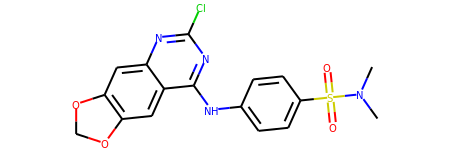

In [6]:
lig_MOLECULES[9999]

In [7]:
Chem.GetSSSR(lig_MOLECULES[9999])

4

In [8]:
Chem.CalcNumAliphaticRings(lig_MOLECULES[9999])

1

In [9]:
Chem.CalcNumAromaticRings(lig_MOLECULES[9999])

3

In [10]:
Chem.CalcNumRotatableBonds(lig_MOLECULES[9999])

4

In [11]:
lig_MOLECULES[9999].GetNumHeavyAtoms()

27

In [12]:
rdescriptors.CalcNumLipinskiHBA(lig_MOLECULES[9999]), rdescriptors.CalcNumLipinskiHBD(lig_MOLECULES[9999])

(8, 1)

In [13]:
rdescriptors.CalcExactMolWt(lig_MOLECULES[9999])

406.05025364

In [14]:
rdescriptors.CalcTPSA(lig_MOLECULES[9999])

93.65

In [15]:
Descriptors.MolLogP(lig_MOLECULES[9999])

3.0058000000000007

Všechno odpovídá, definuji tedy veličiny kám uložím různé deskriptory všech látek. Pro erbB1 i pro drugabank. Přidávám pro zajímavost počty alifatických a aromatických kruhů, třeba to něco ukáže.

In [16]:
lig_RINGS = [Chem.GetSSSR(x) for x in lig_MOLECULES]
lig_Aliph_RINGS = [Chem.CalcNumAliphaticRings(x) for x in lig_MOLECULES]
lig_Arom_RINGS = [Chem.CalcNumAromaticRings(x) for x in lig_MOLECULES]
lig_RotBond = [Chem.CalcNumRotatableBonds(x) for x in lig_MOLECULES]
lig_AtomCount = [x.GetNumHeavyAtoms() for x in lig_MOLECULES]
lig_HBAcc = [rdescriptors.CalcNumLipinskiHBA(x) for x in lig_MOLECULES]
lig_HBDon = [rdescriptors.CalcNumLipinskiHBD(x) for x in lig_MOLECULES]
lig_MolWt = [rdescriptors.CalcExactMolWt(x) for x in lig_MOLECULES]
lig_TPSA = [rdescriptors.CalcTPSA(x) for x in lig_MOLECULES]
lig_LogP = [Descriptors.MolLogP(x) for x in lig_MOLECULES]

In [17]:
tabulka_hodnot_erbB1 = pd.DataFrame(data={'set':'erbB1', 'rings': lig_RINGS,'aliphatic rings': lig_Aliph_RINGS,'aromatic rings': lig_Arom_RINGS,
                        'rotatable bonds': lig_RotBond, 'heavy atoms': lig_AtomCount,
                        'HBA': lig_HBAcc, 'HBD': lig_HBDon, 'MW': lig_MolWt,
                        'TPSA': lig_TPSA, 'logP': lig_LogP})
tabulka_hodnot_erbB1

,set,rings,aliphatic rings,aromatic rings,rotatable bonds,heavy atoms,HBA,HBD,MW,TPSA,logP
0,erbB1,4,0,4,4,25,7,5,351.099921,104.54,4.07570
1,erbB1,2,0,2,4,22,5,3,294.100442,93.35,2.32118
2,erbB1,4,0,4,6,32,7,2,436.134697,85.37,4.92110
3,erbB1,6,1,5,13,49,14,1,707.192895,159.09,4.89210
4,erbB1,3,0,3,11,37,9,4,523.198632,118.81,4.60350
...,...,...,...,...,...,...,...,...,...,...,...
12491,erbB1,5,1,4,11,42,10,2,588.225181,101.08,5.58160
12492,erbB1,3,0,3,10,30,7,1,429.145534,74.73,3.82690
12493,erbB1,5,0,5,11,40,8,2,580.134732,106.35,6.13910
12494,erbB1,3,0,3,3,20,4,0,285.093583,42.16,4.02102


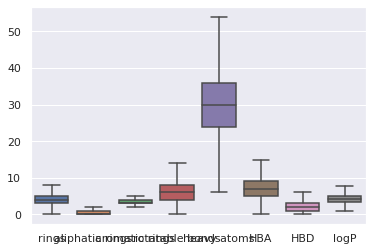

In [18]:
sns.boxplot(data=tabulka_hodnot_erbB1[['rings', 'aliphatic rings', 'aromatic rings', 'rotatable bonds', 'heavy atoms', 'HBA', 'HBD', 'logP']], showfliers=False)

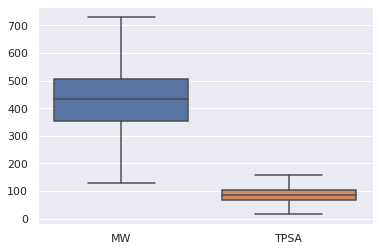

In [19]:
sns.boxplot(data=tabulka_hodnot_erbB1[['MW', 'TPSA']], showfliers = False)

In [20]:
drugbank_RINGS = [Chem.GetSSSR(l) for l in drugs]
drugbank_Aliph_RINGS = [Chem.GetSSSR(l) for l in drugs]
drugbank_Arom_RINGS = [Chem.GetSSSR(l) for l in drugs]
drugbank_RotBond = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_AtomCount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_HBAcc = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_HBDon = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_MolWt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_TPSA = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_LogP = [Descriptors.MolLogP(l) for l in drugs]

In [21]:
tabulka_hodnot_drugbank = pd.DataFrame(data={'set':'drugbank', 'rings': drugbank_RINGS,'aliphatic rings': drugbank_Aliph_RINGS,'aromatic rings': drugbank_Arom_RINGS,
                        'rotatable bonds': drugbank_RotBond, 'heavy atoms': drugbank_AtomCount,
                        'HBA': drugbank_HBAcc, 'HBD': drugbank_HBDon, 'MW': drugbank_MolWt,
                        'TPSA': drugbank_TPSA, 'logP': drugbank_LogP})
tabulka_hodnot_drugbank

,set,rings,aliphatic rings,aromatic rings,rotatable bonds,heavy atoms,HBA,HBD,MW,TPSA,logP
0,drugbank,6,6,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugbank,6,6,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugbank,4,4,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugbank,6,6,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugbank,1,1,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...,...,...,...
7108,drugbank,1,1,1,0,8,1,1,128.002892,20.23,2.04560
7109,drugbank,3,3,3,3,24,9,5,340.079432,149.82,-1.32270
7110,drugbank,6,6,6,14,79,27,13,1114.554641,403.10,1.54710
7111,drugbank,0,0,0,13,21,5,0,330.147689,83.50,-0.00030


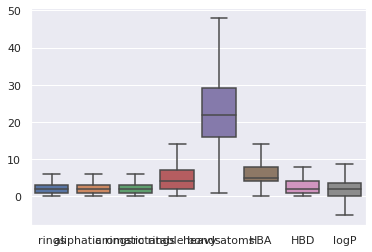

In [22]:
sns.boxplot(data=tabulka_hodnot_drugbank[['rings', 'aliphatic rings', 'aromatic rings', 'rotatable bonds', 'heavy atoms', 'HBA', 'HBD', 'logP']], showfliers=False)

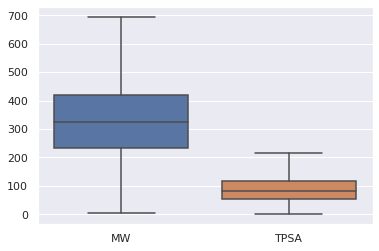

In [23]:
sns.boxplot(data=tabulka_hodnot_drugbank[['MW', 'TPSA']], showfliers = False)

Pro lepší přehlednost kombinuji pro porovnání nejprve deskriptory (rings, aliphatic rings a aromatic rings)

In [24]:
tabulka_hodnot_erbB1_KRUHY = pd.DataFrame(data={'set':'erbB1', 'rings': lig_RINGS,'aliphatic rings': lig_Aliph_RINGS,'aromatic rings': lig_Arom_RINGS})
tabulka_hodnot_drugbank_KRUHY = pd.DataFrame(data={'set':'drugbank', 'rings': drugbank_RINGS,'aliphatic rings': drugbank_Aliph_RINGS,'aromatic rings': drugbank_Arom_RINGS})

In [25]:
tabulka_hodnot_vse_KRUHY = pd.concat([tabulka_hodnot_erbB1_KRUHY, tabulka_hodnot_drugbank_KRUHY], ignore_index=True)
tabulka_hodnot_vse_KRUHY

,set,rings,aliphatic rings,aromatic rings
0,erbB1,4,0,4
1,erbB1,2,0,2
2,erbB1,4,0,4
3,erbB1,6,1,5
4,erbB1,3,0,3
...,...,...,...,...
19604,drugbank,1,1,1
19605,drugbank,3,3,3
19606,drugbank,6,6,6
19607,drugbank,0,0,0


In [26]:
sjednocena_tabulka_KRUHY = pd.melt(tabulka_hodnot_vse_KRUHY, id_vars=['set'],
value_vars=['rings', 'aliphatic rings', 'aromatic rings'])
sjednocena_tabulka_KRUHY

,set,variable,value
0,erbB1,rings,4
1,erbB1,rings,2
2,erbB1,rings,4
3,erbB1,rings,6
4,erbB1,rings,3
...,...,...,...
58822,drugbank,aromatic rings,1
58823,drugbank,aromatic rings,3
58824,drugbank,aromatic rings,6
58825,drugbank,aromatic rings,0


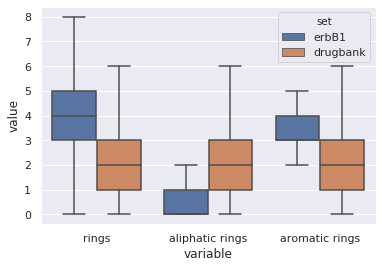

In [27]:
sns.boxplot(y='value', x='variable', hue='set', data=sjednocena_tabulka_KRUHY, showfliers=False)

Po vizualizaci můžeme vidět, že počet kruhů ligandů erbB1 je obecně vyšší než u různorodé sbírky ligandů v drugbanku. Taktéž je zřejmé, že u erbB1 ligandů převažují kruhy aromatické, což by teoreticky mohlo nahrávat k myšlence, že tu bude nějaká role pi-pi interakce při interakci ligandu s protreinem.

Dále kombinuji pro porovnání deskriptory (heavy atoms, HBA a HBD)

In [28]:
tabulka_hodnot_erbB1_ATOMY = pd.DataFrame(data={'set':'erbB1', 'heavy atoms': lig_AtomCount,'HBA': lig_HBAcc, 'HBD': lig_HBDon})
tabulka_hodnot_drugbank_ATOMY = pd.DataFrame(data={'set':'drugbank', 'heavy atoms': drugbank_AtomCount,'HBA': drugbank_HBAcc, 'HBD': drugbank_HBDon})
tabulka_hodnot_vse_ATOMY = pd.concat([tabulka_hodnot_erbB1_ATOMY, tabulka_hodnot_drugbank_ATOMY], ignore_index=True)
sjednocena_tabulka_ATOMY = pd.melt(tabulka_hodnot_vse_ATOMY, id_vars=['set'],
value_vars=['heavy atoms', 'HBA', 'HBD'])
sjednocena_tabulka_ATOMY

,set,variable,value
0,erbB1,heavy atoms,25
1,erbB1,heavy atoms,22
2,erbB1,heavy atoms,32
3,erbB1,heavy atoms,49
4,erbB1,heavy atoms,37
...,...,...,...
58822,drugbank,HBD,1
58823,drugbank,HBD,5
58824,drugbank,HBD,13
58825,drugbank,HBD,0


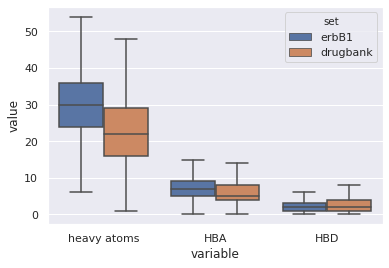

In [29]:
sns.boxplot(y='value', x='variable', hue='set', data=sjednocena_tabulka_ATOMY, showfliers=False)

Po té to vizualizaci můžeme vidět, že erbB1 ligandy mají obecně vyšší počet atomů než ligandy drugbanku, ovšem počty akceptorů a donorů vodíkových vazeb  jsou si podobné.

In [30]:
tabulka_hodnot_erbB1_Rot_logP = pd.DataFrame(data={'set':'erbB1', 'rotatable bonds': lig_RotBond, 'logP': lig_LogP})
tabulka_hodnot_drugbank_Rot_logP = pd.DataFrame(data={'set':'drugbank', 'rotatable bonds': drugbank_RotBond, 'logP': drugbank_LogP})
tabulka_hodnot_vse_Rot_logP = pd.concat([tabulka_hodnot_erbB1_Rot_logP, tabulka_hodnot_drugbank_Rot_logP], ignore_index=True)
sjednocena_tabulka_Rot_logP = pd.melt(tabulka_hodnot_vse_Rot_logP, id_vars=['set'],
value_vars=['rotatable bonds', 'logP'])
sjednocena_tabulka_Rot_logP

,set,variable,value
0,erbB1,rotatable bonds,4.0000
1,erbB1,rotatable bonds,4.0000
2,erbB1,rotatable bonds,6.0000
3,erbB1,rotatable bonds,13.0000
4,erbB1,rotatable bonds,11.0000
...,...,...,...
39213,drugbank,logP,2.0456
39214,drugbank,logP,-1.3227
39215,drugbank,logP,1.5471
39216,drugbank,logP,-0.0003


In [31]:
tabulka_hodnot_erbB1_MW_TPSA = pd.DataFrame(data={'set':'erbB1', 'MW': lig_MolWt,'TPSA': lig_TPSA})
tabulka_hodnot_drugbank_MW_TPSA = pd.DataFrame(data={'set':'drugbank', 'MW': drugbank_MolWt,'TPSA': drugbank_TPSA})
tabulka_hodnot_vse_MW_TPSA = pd.concat([tabulka_hodnot_erbB1_MW_TPSA, tabulka_hodnot_drugbank_MW_TPSA], ignore_index=True)
sjednocena_tabulka_MW_TPSA = pd.melt(tabulka_hodnot_vse_MW_TPSA, id_vars=['set'],
value_vars=['MW', 'TPSA'])
sjednocena_tabulka_MW_TPSA

,set,variable,value
0,erbB1,MW,351.099921
1,erbB1,MW,294.100442
2,erbB1,MW,436.134697
3,erbB1,MW,707.192895
4,erbB1,MW,523.198632
...,...,...,...
39213,drugbank,TPSA,20.230000
39214,drugbank,TPSA,149.820000
39215,drugbank,TPSA,403.100000
39216,drugbank,TPSA,83.500000


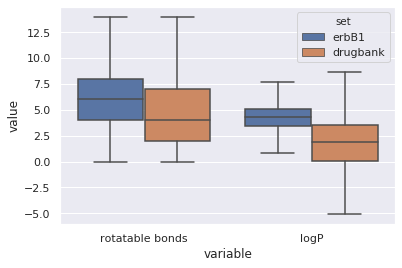

In [32]:
sns.boxplot(y='value', x='variable', hue='set', data=sjednocena_tabulka_Rot_logP, showfliers=False)

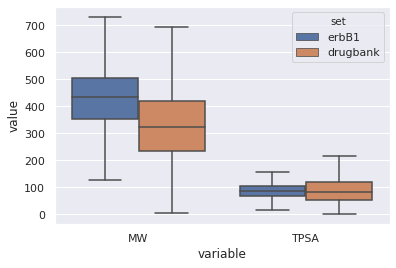

In [33]:
sns.boxplot(y='value', x='variable', hue='set', data=sjednocena_tabulka_MW_TPSA, showfliers=False)

Po vizualizaci posledních deskriptorů je zřejmé, že molekulové hmotnosti ligandů erbB1 jsou vyšší než ligandů drugbanku, což koreluje s počtem atomů. 

Dále, že TPSA hodnoty se od sebe navzájem tak neliší na to, že počet molekul je celkem vysoký. Stejně jako hodnoty logP, které jsou obecně vyšší než u ligandů drugbanku, což by mohlo být na vysoký počet cyklů a vcelku nízky počet HBA a HBD odpovídající.



In [34]:
erbB1_HeteroatomsRatio = [rdescriptors.CalcNumHeteroatoms(x)/x.GetNumHeavyAtoms() for x in lig_MOLECULES if x.GetNumHeavyAtoms()>0]
drugbank_HeteroatomsRatio = [rdescriptors.CalcNumHeteroatoms(x)/x.GetNumHeavyAtoms() for x in drugs if x.GetNumHeavyAtoms()>0]
erbB1_HeterocyclesRatio = [rdescriptors.CalcNumHeterocycles(x)/rdescriptors.CalcNumRings(x)
                           for x in lig_MOLECULES if rdescriptors.CalcNumRings(x)>0]
drugbank_HeterocyclesRatio = [rdescriptors.CalcNumHeterocycles(x)/rdescriptors.CalcNumRings(x)
                               for x in drugs if rdescriptors.CalcNumRings(x)>0]
erbB1_CarbocyclesRatio = [(rdescriptors.CalcNumAliphaticCarbocycles(x)+rdescriptors.CalcNumAromaticCarbocycles(x))/rdescriptors.CalcNumRings(x)
                           for x in lig_MOLECULES if rdescriptors.CalcNumRings(x)>0]
drugbank_CarbocyclesRatio = [(rdescriptors.CalcNumAliphaticCarbocycles(x)+rdescriptors.CalcNumAromaticCarbocycles(x))/rdescriptors.CalcNumRings(x)
                               for x in drugs if rdescriptors.CalcNumRings(x)>0]

In [35]:
tabulka_HetRatio = pd.DataFrame(data=[{'set': 'erbB1', 'variable': 'heteroatom ratio', 'value': x}
                        for x in erbB1_HeteroatomsRatio])
tabulka_HetRatio = tabulka_HetRatio.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heteroatom ratio', 'value': x}
                                  for x in drugbank_HeteroatomsRatio]), ignore_index=True)
tabulka_HetRatio = tabulka_HetRatio.append(pd.DataFrame(data=[{'set': 'erbB1', 'variable': 'heterocycle ratio', 'value': x}
                                  for x in erbB1_HeterocyclesRatio]), ignore_index=True)
tabulka_HetRatio = tabulka_HetRatio.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heterocycle ratio', 'value': x}
                                  for x in drugbank_HeterocyclesRatio]), ignore_index=True)
tabulka_HetRatio = tabulka_HetRatio.append(pd.DataFrame(data=[{'set': 'erbB1', 'variable': 'carborocycle ratio', 'value': x}
                                  for x in erbB1_CarbocyclesRatio]), ignore_index=True)
tabulka_HetRatio = tabulka_HetRatio.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'carbocycle ratio', 'value': x}
                                  for x in drugbank_CarbocyclesRatio]), ignore_index=True)
tabulka_HetRatio

,set,variable,value
0,erbB1,heteroatom ratio,0.320000
1,erbB1,heteroatom ratio,0.227273
2,erbB1,heteroatom ratio,0.281250
3,erbB1,heteroatom ratio,0.326531
4,erbB1,heteroatom ratio,0.270270
...,...,...,...
56654,drugbank,carbocycle ratio,1.000000
56655,drugbank,carbocycle ratio,1.000000
56656,drugbank,carbocycle ratio,0.333333
56657,drugbank,carbocycle ratio,0.500000


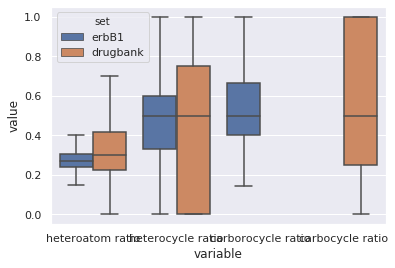

In [36]:
sns.boxplot(y='value', x='variable', hue='set', data=tabulka_HetRatio, showfliers=False)

Na závěr jsem se pokusil vizualizovat podíl heteroatomů, heterocyklů a taktéž karbacyklů (který jsem doufám získal součtem počtu alifatických a aromatických karbacyklů).

Ze získaného grafu je vidět, že podíl heteroatomů v molekulách erbB1 liagndů je celkem nízký, stejně jako podíl heterocyklů, který je dokonce o trochu nižší než podíl karbacyklů.

Toto zjištění mě opět zavádí k myšlence, že by při interakcích s proteinem mohly hrát důležitou roli pi-pi interakce.